# Predicting Sales Prices

 ## Dataset Attributes

 The dataset contains information about houses in Ames, Iowa. The data was collected by the Ames City Assessor’s Office describing 2930 property sales which occurred in Ames, Iowa between 2006 and 2010. The dataset, containing 81 variables, was compiled and published by De Cock in 2011.

 Some of the variables contained in the original dataset have been removed from the the dataset provided to you.
 The dataset provided to you contains the following variables:
* **Year_Built:** year that the house was originally constructed
* **Year_Remod_Add:** year that the house was last remodelled
* **Total_Bsmt_SF:** total size of basement area in square feet
* **First_Flr_SF:** size of the first floor in square feet
* **Second_Flr_SF:** size of the second floor in square feet
* **Gr_Liv_Area:** size of above grade, ground living area in square feet
* **Full_Bath:** number of full above grade bathrooms in the house
* **Half_Bath:** number of half above grade bathrooms in the house
* **Bedroom_AbvGr:** number of above grade bedrooms (does not include basement bedrooms)
* **Kitchen_AbvGr:** number of above grade kitchens
* **TotRms_AbvGrd:** total number of above grade rooms (does not include bathrooms)
* **Fireplaces:** number of fireplaces in the house
* **Garage_Area:** size of garage in square feet
* **Sale_Price:** sale price of the house in dollars


*De Cock, D. (2011). "Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester
Regression Project," Journal of Statistics Education, Volume 19, Number 3.*

- https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt
- http://ww2.amstat.org/publications/jse/v19n3/decock.pdf


 ## Objective

 The goal of this task is to analyse the relationship between these variables and build a multiple linear regression model to predict the sales prices based on the 'Gr_Liv_Area' and 'Garage_Area` variables.


In [585]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [586]:
# Read in the data set
# Show the first 5 rows
houses_data = pd.read_csv('ames.csv')
houses_data.head()

,Year_Built,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Area,Sale_Price
0,1960,1960,1080,1656,0,1656,1,0,3,1,7,2,528,215000
1,1961,1961,882,896,0,896,1,0,2,1,5,0,730,105000
2,1958,1958,1329,1329,0,1329,1,1,3,1,6,0,312,172000
3,1968,1968,2110,2110,0,2110,2,1,3,1,8,2,522,244000
4,1997,1998,928,928,701,1629,2,1,3,1,6,1,482,189900


In [587]:
# Clean and pre-process the data if neccessary
houses_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Year_Built      2930 non-null   int64
 1   Year_Remod_Add  2930 non-null   int64
 2   Total_Bsmt_SF   2930 non-null   int64
 3   First_Flr_SF    2930 non-null   int64
 4   Second_Flr_SF   2930 non-null   int64
 5   Gr_Liv_Area     2930 non-null   int64
 6   Full_Bath       2930 non-null   int64
 7   Half_Bath       2930 non-null   int64
 8   Bedroom_AbvGr   2930 non-null   int64
 9   Kitchen_AbvGr   2930 non-null   int64
 10  TotRms_AbvGrd   2930 non-null   int64
 11  Fireplaces      2930 non-null   int64
 12  Garage_Area     2930 non-null   int64
 13  Sale_Price      2930 non-null   int64
dtypes: int64(14)
memory usage: 320.6 KB


<function matplotlib.pyplot.show(close=None, block=None)>

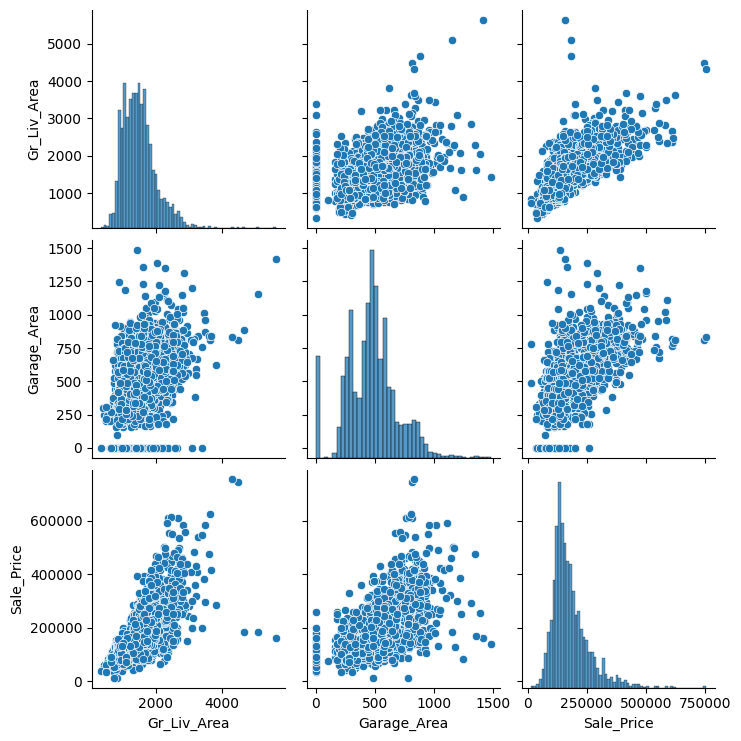

In [588]:
# Explore the data with visualisations such as histograms and correlation matrices

# Explore the data using a pairplot
sns.pairplot(data=houses_data, vars=["Gr_Liv_Area", "Garage_Area", "Sale_Price"])
plt.show

In [589]:
# Split the independent variables from the dependent variable

# Assigns independent variables
X = houses_data[['Gr_Liv_Area', 'Garage_Area']].values

# Assignes dependent variables & reshape data
y = houses_data[['Sale_Price']].values
y = y.reshape(-1, 1)
X = X.reshape(-1, X.shape[1])

# Get intercept and coefficients
# print('Intercept: \n', housing_model.intercept_)
# print('Coefficients: \n', housing_model.coef_)

<function matplotlib.pyplot.show(close=None, block=None)>

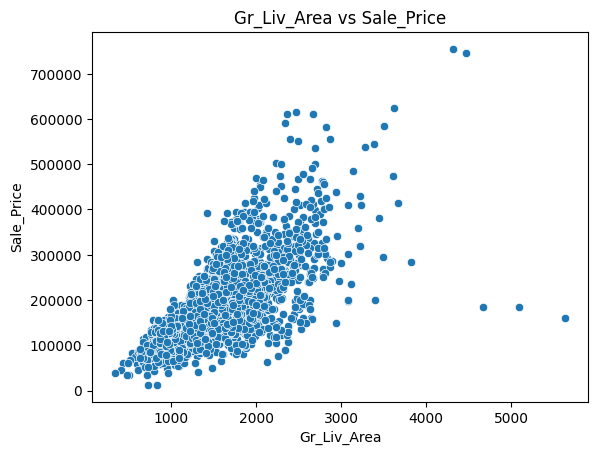

In [590]:
# Explore relationships between the independent and dependent variables
sns.scatterplot(data=houses_data, x="Gr_Liv_Area", y="Sale_Price")
plt.title("Gr_Liv_Area vs Sale_Price")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

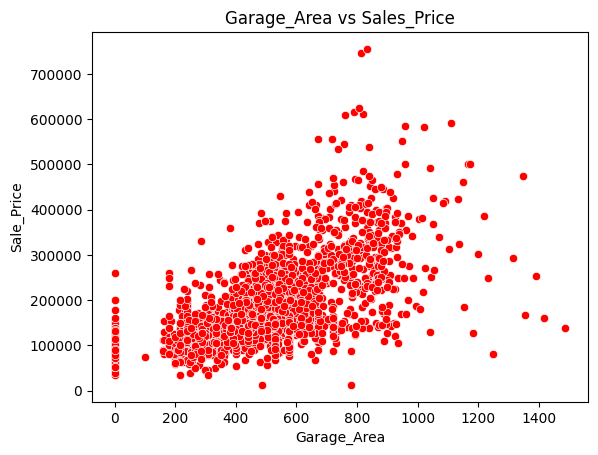

In [591]:
# Explore relationships between the independent and dependent variables
sns.scatterplot(data=houses_data, x="Garage_Area", y="Sale_Price", color="red")
plt.title("Garage_Area vs Sales_Price")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

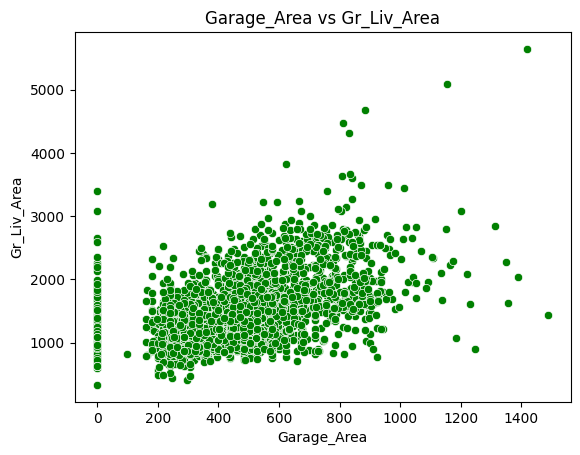

In [592]:
# Explore relationships between the independent and dependent variables
sns.scatterplot(data=houses_data, x="Garage_Area", y="Gr_Liv_Area", color="green")
plt.title("Garage_Area vs Gr_Liv_Area")
plt.show

In [593]:
# Create a training and test set with a 75:25 split ratio

# Split data into training and test sets
rseed = 23 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,  random_state=rseed)

print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_test.shape, y_test.shape)

Training data: (2197, 2) (2197, 1)
Test data: (733, 2) (733, 1)


In [594]:
# Build a multiple linear regression model using 'Gr_Liv_Area' and 'Garage_Area'
# Fit the scaler on train data
scaler1 = MinMaxScaler()
scaler1.fit(X_train)

scaler2 = StandardScaler()
scaler2.fit(y_train)

# Apply the scaler on train and test data
X_train = scaler1.transform(X_train)
X_test = scaler1.transform(X_test)

y_train = scaler2.transform(y_train)
y_test = scaler2.transform(y_test)


In [595]:
# Fit a model
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

In [596]:
# Print the model intercept and coefficients
print('Intercept: \n', lm.intercept_)
print('Coefficients: \n', lm.coef_)

Intercept: 
 [-2.0345458]
Coefficients: 
 [[5.07593277 2.68773103]]


In [597]:
# Generate predictions for the test set
predictions = lm.predict(X_test)
predictions

array([[-9.55519227e-01],
       [-2.77950310e-01],
       [-1.69164212e-01],
       [-1.53972897e+00],
       [ 2.31333420e+00],
       [ 2.71034394e-01],
       [ 1.10543014e+00],
       [ 1.41528903e+00],
       [ 3.19333273e-01],
       [ 5.43482804e-01],
       [-6.25361414e-01],
       [-3.39090185e-01],
       [ 5.30242085e-01],
       [-1.36464206e-01],
       [-1.11484548e+00],
       [ 1.11354131e-01],
       [ 1.19462550e+00],
       [ 1.16932252e+00],
       [-7.16535145e-01],
       [-6.20478715e-02],
       [-7.92833522e-01],
       [-9.00794865e-01],
       [-2.98654014e-01],
       [-5.99415904e-01],
       [ 3.71487350e-01],
       [ 6.55871167e-01],
       [ 2.84583879e-01],
       [-6.12368412e-01],
       [ 9.84773945e-02],
       [-7.76268472e-01],
       [ 3.85967887e-01],
       [ 6.46036814e-02],
       [ 2.55273853e-01],
       [-1.29583013e-01],
       [-9.81626713e-01],
       [ 2.49875287e-01],
       [-4.30678824e-01],
       [ 9.58753156e-01],
       [ 2.1

In [598]:
# Evaluate the model using mean squared error and root mean squared error
mse = round(mean_squared_error(y_test, predictions),4)
rmse = round((mse**0.5),4)
print(f"The mean squared error is: {mse}\n")
print(f"The root mean squared error is: {rmse}\n")

The mean squared error is: 0.4494

The root mean squared error is: 0.6704



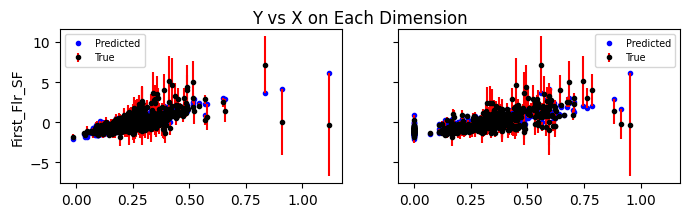

In [599]:
# Generate a plot
## Plot the errors
fig, ax = plt.subplots(1, X_test.shape[1], sharey=True, sharex=True, figsize=(8,2))
fig.suptitle("Y vs X on Each Dimension")
ax[0].set_ylabel(houses_data.columns[3])

# Get values for the error bar
error_bar_values = np.abs((y_test-predictions)[:,0])

# Plot data, predicted values, and error bars
for i in range(X_test.shape[1]):
    ax[i].errorbar(X_test[:, i], y_test[:, 0], yerr=error_bar_values, fmt='.k', ecolor='red', label='True')
    ax[i].scatter(X_test[:,i], predictions[:,0], c='b', marker='.', label='Predicted')
    ax[i].legend(loc='best', fontsize='x-small')

In [600]:
# Print the coefficients

print("Coefficients:")
print(lm.coef_)

Coefficients:
[[5.07593277 2.68773103]]


**Interpret coefficients in the context of the prediction:**
[Answer here]

The coeffients reflect that there is a postive relationsip between the dependent and independent variables

Gr_Liv_Area - For every additional square foot of size above grade, ground living room area, then the sale price of the house increases by $5.06 keeping all other variables constant.

Garage_Area - For every additional square foot increase in the garage size, then the sale price of the house increases by $2.69, keeping all other variables constant.


**Summarise findings**
[Answer here]

**Insights from exploratory data analysis**

The model containts data regarding housing prices and includes variables such as, Year_Remod_Add, Total_Bsmt_SF, First_Flr_SF, Second_Flr_SF , Gr_Liv_Area, Fireplaces, Garage_Area, Sale_Price.

The Exploratory Data Analysis  shows that there is indeed a postive correlation between the independent and dependent variables.

**Insights from model performance**

A linear regression was utilized to PREDICT the relationship between Gr_Liv_Area and Garage_Area as indepedent variables as well as the Sales_Price as the dependent variable.

The predicted Model was evaluated using:
1. mean squared error which yeilded an output of 0.4494 which means the model is doing a decent job of predicting the target variable as only  0.4494 units of mistakes are made on average.
2. root mean squared error which yeilded an output of 0.6704 which indicates that the model is doing a good job at predicying target variables.

**notable observations**

The model could be improved by adding more features, such as exploring the relationship between Bedroom_AbvGr, Year_Remod_Add as Sale_Price

**References**

1. https://seaborn.pydata.org/generated/seaborn.pairplot.html
2. https://medium.com/@wl8380/understanding-mean-squared-error-mse-in-regression-models-9ade100c9627
3. https://www.bmc.com/blogs/mean-squared-error-r2-and-variance-in-regression-analysis/
4. https://www.kaggle.com/code/ekami66/detailed-exploratory-data-analysis-with-python
5. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 

